## Imports

In [8]:
import pandas as pd
from pathlib import Path

In [9]:
path = Path("fatal-police-shootings-data.csv")
df = pd.read_csv(path, index_col='date', infer_datetime_format=True, parse_dates=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6233 entries, 2015-01-02 to 2021-04-21
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       6233 non-null   int64  
 1   name                     6001 non-null   object 
 2   manner_of_death          6233 non-null   object 
 3   armed                    6025 non-null   object 
 4   age                      5955 non-null   float64
 5   gender                   6232 non-null   object 
 6   race                     5682 non-null   object 
 7   city                     6233 non-null   object 
 8   state                    6233 non-null   object 
 9   signs_of_mental_illness  6233 non-null   bool   
 10  threat_level             6233 non-null   object 
 11  flee                     5856 non-null   object 
 12  body_camera              6233 non-null   bool   
 13  longitude                5933 non-null   float64
 14  latitu

In [10]:
df.head()

,id,name,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
date,,,,,,,,,,,,,,,,
2015-01-02,3,Tim Elliot,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
2015-01-02,4,Lewis Lee Lembke,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2015-01-03,5,John Paul Quintero,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
2015-01-04,8,Matthew Hoffman,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
2015-01-04,9,Michael Rodriguez,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


In [11]:
df.isnull().sum()

id                           0
name                       232
manner_of_death              0
armed                      208
age                        278
gender                       1
race                       551
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       377
body_camera                  0
longitude                  300
latitude                   300
is_geocoding_exact           0
dtype: int64

In [12]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4828 entries, 2015-01-02 to 2021-04-21
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       4828 non-null   int64  
 1   name                     4828 non-null   object 
 2   manner_of_death          4828 non-null   object 
 3   armed                    4828 non-null   object 
 4   age                      4828 non-null   float64
 5   gender                   4828 non-null   object 
 6   race                     4828 non-null   object 
 7   city                     4828 non-null   object 
 8   state                    4828 non-null   object 
 9   signs_of_mental_illness  4828 non-null   bool   
 10  threat_level             4828 non-null   object 
 11  flee                     4828 non-null   object 
 12  body_camera              4828 non-null   bool   
 13  longitude                4828 non-null   float64
 14  latitu

## Exploratory Analysis

([<matplotlib.patches.Wedge at 0x7fa6f4f279d0>,
 [Text(-0.02791208360927502, 1.0996458137002973, 'W'),
  Text(-0.6938829844025634, -0.8535375820411145, 'B'),
  Text(0.7368233516412028, -0.8167566029584484, 'H'),
  Text(1.0775525636340804, -0.22108928650122625, 'A'),
  Text(1.0944098363623709, -0.11075698656648537, 'N'),
  Text(1.099589224392342, -0.03005890217968811, 'O')],
 [Text(-0.015224772877786372, 0.5998068074728894, '50.8%'),
  Text(-0.3784816278559436, -0.46556595384060784, '26.7%'),
  Text(0.40190364634974696, -0.4455036016136991, '18.4%'),
  Text(0.5877559438004074, -0.12059415627339612, '1.8%'),
  Text(0.5969508198340204, -0.06041290176353747, '1.5%'),
  Text(0.599775940577641, -0.01639576482528442, '0.9%')])

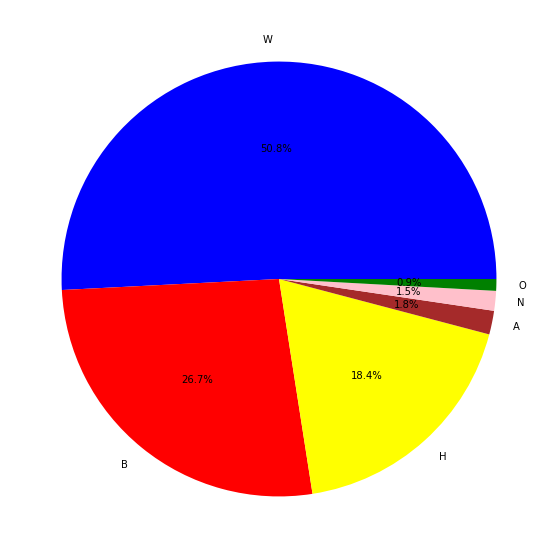

In [13]:
# shootings by race
labels = df.race.value_counts().index
colors = ['blue','red','yellow','brown','pink','green']
explode = [0,0,0,0,0,0]
size = df.race.value_counts().values

plt.figure(figsize = (10,10))
plt.pie(size, explode=explode,labels=labels,colors=colors,autopct='%1.1f%%')

<AxesSubplot:xlabel='race', ylabel='age'>

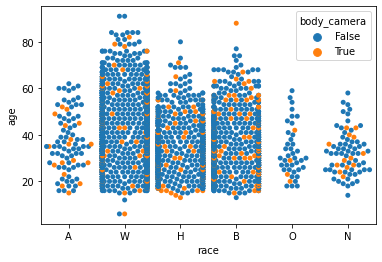

In [14]:
sns.swarmplot(x='race',y='age',hue='body_camera',data=df)

Text(0.5, 0, 'weapon type')

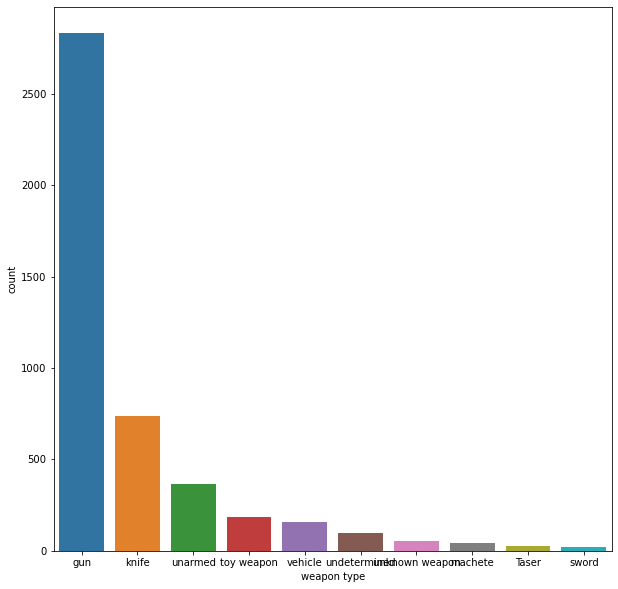

In [15]:
armed = df.armed.value_counts()
plt.figure(figsize=(10,10))
sns.barplot(x=armed[:10].index,y=armed[:10].values)
plt.ylabel('count')
plt.xlabel('weapon type')

In [16]:
weaponTypesNorm = df['armed'].value_counts(normalize=True)
weaponTypesNorm

gun              0.586785
knife            0.153065
unarmed          0.075601
toy weapon       0.038525
vehicle          0.032104
                   ...   
bow and arrow    0.000207
wasp spray       0.000207
fireworks        0.000207
oar              0.000207
wrench           0.000207
Name: armed, Length: 95, dtype: float64

In [17]:
minors = df.loc[df['age'] <= 18]
minors = minors.loc[minors['armed'] == 'toy weapon']
minors['race'].value_counts()

W    6
B    5
H    4
A    1
Name: race, dtype: int64

<AxesSubplot:>

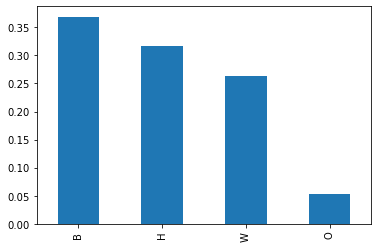

In [18]:
minors = df.loc[df['age'] <= 18]
minors = minors.loc[minors['armed'] == 'unarmed']
plot_minors = minors['race'].value_counts(normalize=True)
plot_minors.plot.bar()

In [22]:
plot_unarmed

W    0.427397
B    0.339726
H    0.186301
A    0.021918
O    0.013699
N    0.010959
Name: race, dtype: float64

<AxesSubplot:>

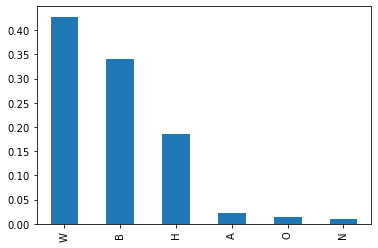

In [21]:
unarmed = df.loc[df["armed"] == 'unarmed']
plot_unarmed = unarmed['race'].value_counts(normalize=True)
plot_unarmed.plot.bar()

In [23]:
weaponTypes = df['armed'].value_counts(normalize=True)
weaponTypes

gun              0.586785
knife            0.153065
unarmed          0.075601
toy weapon       0.038525
vehicle          0.032104
                   ...   
bow and arrow    0.000207
wasp spray       0.000207
fireworks        0.000207
oar              0.000207
wrench           0.000207
Name: armed, Length: 95, dtype: float64

In [24]:
weaponTypes = df['armed'].value_counts(normalize=True)
weaponTypes

gun              0.586785
knife            0.153065
unarmed          0.075601
toy weapon       0.038525
vehicle          0.032104
                   ...   
bow and arrow    0.000207
wasp spray       0.000207
fireworks        0.000207
oar              0.000207
wrench           0.000207
Name: armed, Length: 95, dtype: float64

In [25]:
weaponTypes = df['armed'].value_counts(normalize=True)
weaponTypes

gun              0.586785
knife            0.153065
unarmed          0.075601
toy weapon       0.038525
vehicle          0.032104
                   ...   
bow and arrow    0.000207
wasp spray       0.000207
fireworks        0.000207
oar              0.000207
wrench           0.000207
Name: armed, Length: 95, dtype: float64

In [26]:
weaponTypes = df['armed'].value_counts(normalize=True)
weaponTypes

gun              0.586785
knife            0.153065
unarmed          0.075601
toy weapon       0.038525
vehicle          0.032104
                   ...   
bow and arrow    0.000207
wasp spray       0.000207
fireworks        0.000207
oar              0.000207
wrench           0.000207
Name: armed, Length: 95, dtype: float64

<AxesSubplot:>

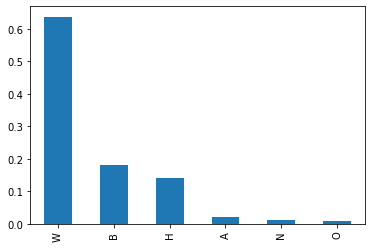

In [27]:
# this is really interesting
# is it easier to identify mental illness in white people due to subconcious bias?
# this doesn't follow the same distribution as other catagories
mentalIllness = df.loc[df['signs_of_mental_illness'] == True]
plot_mental = mentalIllness['race'].value_counts(normalize=True)
plot_mental.plot.bar()

In [28]:
plot_mental

W    0.636980
B    0.180662
H    0.141645
A    0.020356
N    0.011874
O    0.008482
Name: race, dtype: float64

<AxesSubplot:>

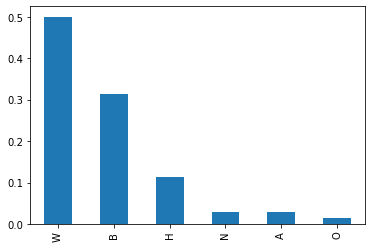

In [29]:
mentalIllness = df.loc[df['signs_of_mental_illness']]
mentalIllness = mentalIllness.loc[mentalIllness['armed']=='unarmed']
plot_mental = mentalIllness['race'].value_counts(normalize=True)
plot_mental.plot.bar()

Text(0, 0.5, 'count')

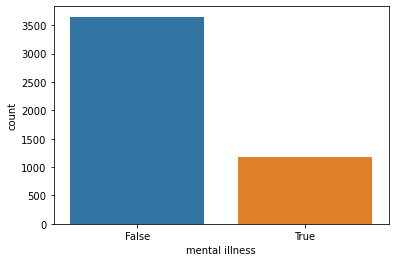

In [30]:
sns.countplot(df.signs_of_mental_illness)
plt.xlabel('mental illness')
plt.ylabel('count')

<AxesSubplot:>

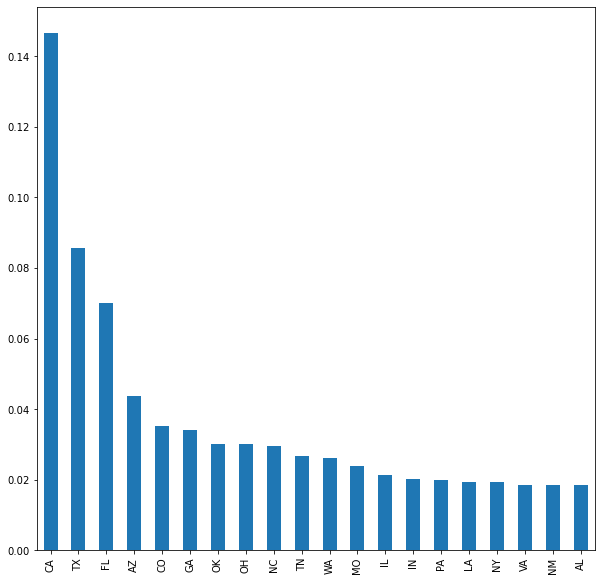

In [31]:
state = df['state'].value_counts(normalize=True)
state.head(20).plot.bar(figsize = (10,10))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Los Angeles'),
  Text(1, 0, 'Phoenix'),
  Text(2, 0, 'Houston'),
  Text(3, 0, 'Las Vegas'),
  Text(4, 0, 'San Antonio'),
  Text(5, 0, 'Jacksonville'),
  Text(6, 0, 'Chicago'),
  Text(7, 0, 'Columbus'),
  Text(8, 0, 'Albuquerque'),
  Text(9, 0, 'St. Louis'),
  Text(10, 0, 'Austin'),
  Text(11, 0, 'Denver')])

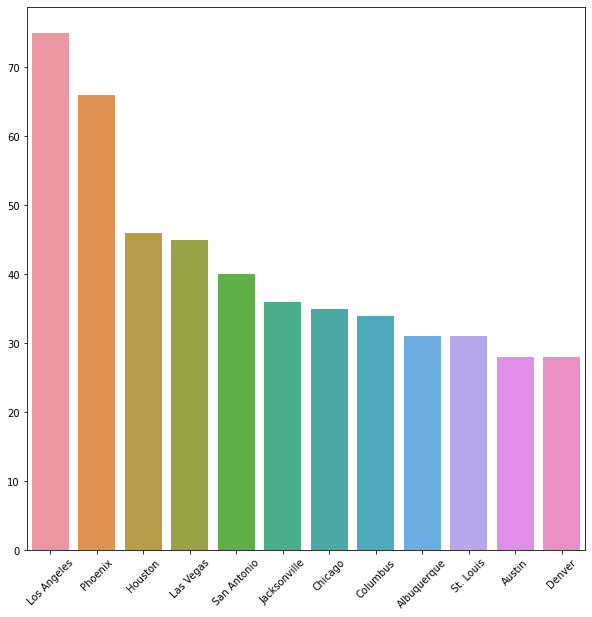

In [32]:
city = df.city.value_counts()
plt.figure(figsize=(10,10))
sns.barplot(x=city[:12].index,y=city[:12].values)
plt.xticks(rotation=45)

In [33]:
from dotenv import load_dotenv
import hvplot.pandas as hv
import plotly.express as px
import plotly.graph_objects as go
import os
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from datetime import datetime


%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import plotly.offline as pyo

In [34]:
df = df.reset_index()

<AxesSubplot:xlabel='date'>

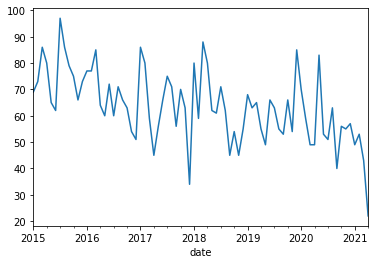

In [35]:
df['date'] = df["date"].apply(lambda x: pd.to_datetime(x))
df['date'].groupby(df.date.dt.to_period('M')).count().plot(kind='line')

<AxesSubplot:xlabel='date'>

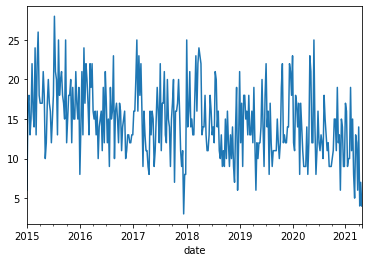

In [36]:
# seems the weekly number of killings has decreased overall 
df['date'] = df["date"].apply(lambda x: pd.to_datetime(x))
df['date'].groupby(df.date.dt.to_period('W')).count().plot(kind='line')

<AxesSubplot:>

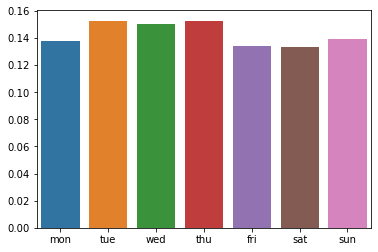

In [37]:
count = df['date'].apply(lambda x: x.dayofweek).value_counts(normalize=True).sort_index()
count.index = ['mon','tue','wed','thu','fri','sat','sun']
f, ax = plt.subplots(1,1)
sns.barplot(x=count.index,y=count.values,ax=ax)

<AxesSubplot:>

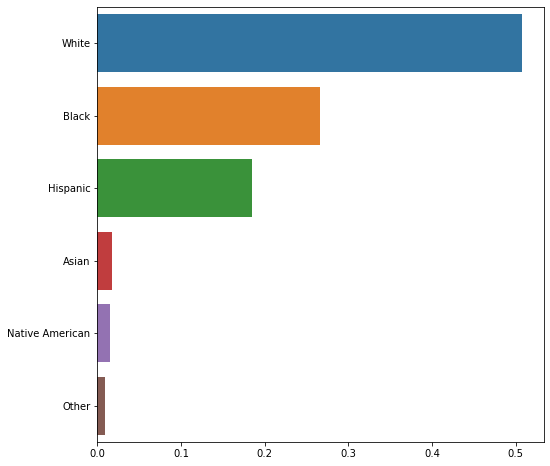

In [42]:
count = df.race.value_counts(normalize=True)
count.index = ['White','Black','Hispanic','Asian','Native American','Other']
f, ax = plt.subplots(1,1,figsize=(8,8))
sns.barplot(y=count.index, x=count.values)

<AxesSubplot:>

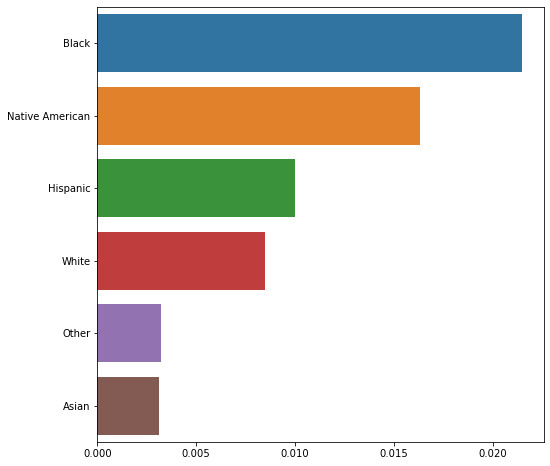

In [48]:
# we need to consider population density
# using census data we will hardcode the 2019 share of race
raceShare = pd.Series([60.0,12.4,0.9,5.6,18.4,2.7],index=['White','Black','Native American','Asian','Hispanic','Other'])
countRace = (count) / (raceShare)
countRace = countRace.sort_values(ascending=False)
f, ax = plt.subplots(1,1,figsize = (8,8))
sns.barplot(y=countRace.index,x=countRace.values)

## Predicting Race Using Random Forest

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection

In [65]:
# mapping T/F values to 0/1 as standard
df['signs_of_mental_illness']=df['signs_of_mental_illness'].astype(int)
df['body_camera'] = df['body_camera'].astype(int)

# encoding string data types
le = LabelEncoder()
le.fit(['race','gender','city','state','threat_level','flea','armed'])

LabelEncoder()

In [66]:
log = df.apply(LabelEncoder().fit_transform)
X = log
y = log['race']

In [67]:
X = X.drop(['race','date','longitude','latitude','is_geocoding_exact','id','name'],axis=1)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 42)

In [69]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [70]:
predictions = model.predict(X_test)
model.feature_importances_

array([0.01404746, 0.09218184, 0.24937919, 0.01381462, 0.2758113 ,
       0.21738871, 0.02242024, 0.0394326 , 0.05273532, 0.02278872])

<AxesSubplot:xlabel='feature_name'>

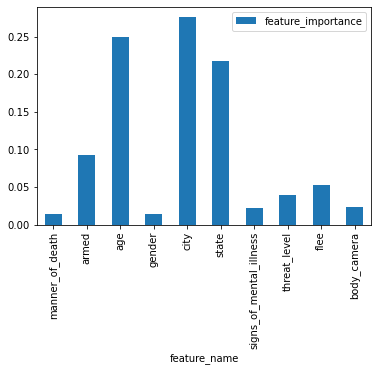

In [80]:
featureImportance = pd.DataFrame({'feature_name': X.columns,'feature_importance':model.feature_importances_})
featureImportance = featureImportance.set_index('feature_name')
featureImportance.plot.bar()

In [81]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.48      0.39      0.43       374
           2       0.41      0.34      0.37       265
           3       0.00      0.00      0.00        17
           4       0.00      0.00      0.00         7
           5       0.63      0.75      0.69       766

    accuracy                           0.56      1449
   macro avg       0.25      0.25      0.25      1449
weighted avg       0.53      0.56      0.54      1449



In [82]:
# model accuracy score
modelAccuracy = accuracy_score(y_test,predictions)
modelAccuracy

0.5624568668046929

In [85]:
params = {'max_depth':[32,44,50],
         "n_estimators":[15,18,26,32],
         "min_samples_leaf": [40,50,60],
         "criterion": ['gini','entropy']}
gridSearch = model_selection.GridSearchCV(estimator=model,param_grid=params,cv=5,scoring='accuracy')
gridSearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [32, 44, 50],
                         'min_samples_leaf': [40, 50, 60],
                         'n_estimators': [15, 18, 26, 32]},
             scoring='accuracy')

In [86]:
gridSearch.best_params_

{'criterion': 'gini',
 'max_depth': 44,
 'min_samples_leaf': 40,
 'n_estimators': 32}

In [88]:
gridSearchAccuracyScore = gridSearch.best_score_
gridSearchAccuracyScore

0.5640758273065964